In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Deployment de Modelos Utilizando MLFlow

Exemplo da AULA - BIG DATA E DEPLOYMENT DE MODELOES - Prof. Helder Prado <BR>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Ferramenta de Gerenciamento e Deployment de Modelos.
    
Modelo Logístico para aplicar Segundo Experimento no MLFlow

In [3]:
chd_dados = pd.read_csv('bases\CHD_preprocessed.csv')
chd_dados

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [4]:
chd_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


# Aplicando Modelo

In [50]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

modelo_inicial = smf.glm(formula='TenYearCHD ~ age + education + cigsPerDay', data=chd_dados,
                         family=sm.families.Binomial()).fit()

In [52]:
modelo_inicial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                            GLM   Df Residuals:                     4129
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1631.1
Date:                Wed, 10 May 2023   Deviance:                       3262.1
Time:                        19:10:41   Pearson chi2:                 4.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06092
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2839      0.319    -19.728      0.000      -6.908      -5.660
age            0.0842      0.006     14.963      0.000       0.073       0.095
education     -0.0381      0.103     -0.370      0.711      -0.240       0.164
cigsPerDay     0.0246      0.004      6.767      0.000       0.017       0.032
==============================================================================
"""

In [10]:
y_hat = modelo_inicial.fittedvalues

In [11]:
y_hat

0       0.045794
1       0.082490
2       0.148304
3       0.390630
4       0.132317
          ...   
4128    0.114315
4129    0.275501
4130    0.148304
4131    0.099030
4132    0.129706
Length: 4133, dtype: float64

## Confusion Matrix e Cut-off

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores

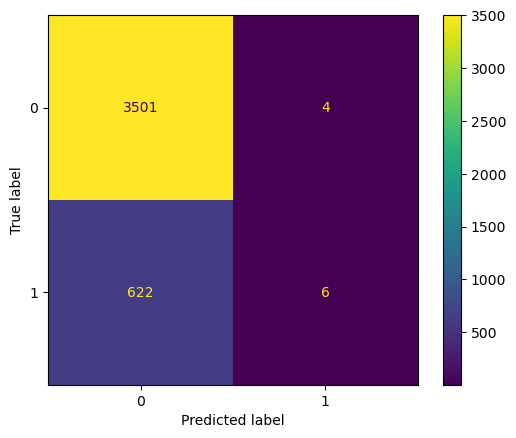

,Sensitividade,Especificidade,Acurácia
0,0.009554,0.998859,0.848536


In [13]:
#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=chd_dados['TenYearCHD'],
                predicts=modelo_inicial.fittedvalues, 
                cutoff=0.5)

# Criando Segundo Experimento no MLFLOW

In [15]:
import mlflow

# Criando Primeiro Experimento
mlflow.create_experiment('modelo_previsao_doenca')

# Acionando o Experimento - Informa qual Experimento estamos usando no momento
mlflow.set_experiment('modelo_previsao_doenca')


<Experiment: artifact_location='file:///C:/Users/leomu/OneDrive/MBA/Big%20Data/python/mlruns/148266236255055752', creation_time=1683754405484, experiment_id='148266236255055752', last_update_time=1683754405484, lifecycle_stage='active', name='modelo_previsao_doenca', tags={}>

## Encapsulando o Modelo

In [55]:
with mlflow.start_run():
    
    # Definindo o Nome da Corrida
    mlflow.set_tag('mlflow.runName', 'Modelo Logistico Inicial')

    # Adicionando Parâmetros
    mlflow.log_param('MODELO', 'LOGÍSTICO')
    mlflow.log_param('FORMULA', 'TenYearCHD ~ male + age + cigsPerDay')
    
    # Modelagem
    import statsmodels.formula.api as smf
    import statsmodels.api as sm

    modelo_encapsulado = smf.glm(formula='TenYearCHD ~ male + age + cigsPerDay', data=chd_dados,
                         family=sm.families.Binomial()).fit()
    
    # Métricas da Performance do Modelo
    from sklearn.metrics import accuracy_score
    y_pred = modelo_encapsulado.fittedvalues.apply(lambda x: 1 if x>= 0.5 else 0)
    acuracia = accuracy_score(chd_dados['TenYearCHD'], y_pred)
    
    print(f'Acurácia: {acuracia:.4f}')
    
    # Adiciona as Metricas no MLFLOW
    mlflow.log_metric('Acurácia', acuracia)
    
    # Função Que retorna previsão baseado na variável explicativa (modelo nulo não possui)
    def pacote_modelo_encapsulado(x):
        return modelo_encapsulado.predict(x)
    
    # Cria Log do Modelo no MLFLOW
    mlflow.sklearn.log_model(pacote_modelo_encapsulado, 'modelo_logistico_doenca')

2023/05/10 19:12:21 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Acurácia: 0.8485


# Modelo Encapsulado Final

In [56]:
with mlflow.start_run():
    
    # Definindo o Nome da Corrida
    mlflow.set_tag('mlflow.runName', 'Modelo Logistico Final')

    # Adicionando Parâmetros
    mlflow.log_param('MODELO', 'LOGÍSTICO')
    mlflow.log_param('FORMULA', 'TenYearCHD ~ male + age + cigsPerDay')
    
    # Modelagem
    import statsmodels.formula.api as smf
    import statsmodels.api as sm

    modelo_encapsulado = smf.glm(formula='TenYearCHD ~ male + age + cigsPerDay + diabetes + totChol + diaBP', 
                                 data=chd_dados,
                                 family=sm.families.Binomial()).fit()
    
    # Métricas da Performance do Modelo
    from sklearn.metrics import accuracy_score
    y_pred = modelo_encapsulado.fittedvalues.apply(lambda x: 1 if x>= 0.5 else 0)
    acuracia = accuracy_score(chd_dados['TenYearCHD'], y_pred)
    
    print(f'Acurácia: {acuracia:.4f}')
    
    # Adiciona as Metricas no MLFLOW
    mlflow.log_metric('Acurácia', acuracia)
    
    # Função Que retorna previsão baseado na variável explicativa (modelo nulo não possui)
    def pacote_modelo_encapsulado(x):
        return modelo_encapsulado.predict(x)
    
    # Cria Log do Modelo no MLFLOW
    mlflow.sklearn.log_model(pacote_modelo_encapsulado, 'modelo_logistico_doenca')

2023/05/10 19:12:27 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Acurácia: 0.8510


In [54]:
modelo_inicial.predict(dados_previsao)

0    0.194053
dtype: float64

## Consumindo o Modelo

In [60]:
dados_previsao = pd.DataFrame({'male':[1],
                               'age':[50], 
                               'cigsPerDay':[50]})

In [61]:
# Consumindo o Modelo em Fase de PRODUÇÃO - LOGISTICO
modelo_logistico_doenca = mlflow.sklearn\
    .load_model('models:/modelo_logistico_doenca/production')

In [62]:
modelo_logistico_doenca(dados_previsao)

0    0.297902
dtype: float64

**30% de chance de vir a ter problemas cardíacos em 10 anos**